# Analisando os filmes no geral

In [0]:
import pandas as pd
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [8]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
notas.shape

(100836, 4)

In [40]:
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [32]:
roundValue = 2
mean = str(round(notas["nota"].mean(),roundValue))
median = str(round(notas["nota"].median(),roundValue))


print("Média: " + mean)
print("Mediana: " + median)

Média: 3.5
Mediana: 3.5


In [33]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

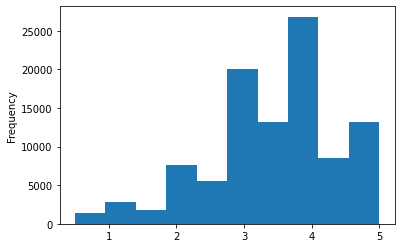

In [34]:
notas.nota.plot(kind="hist")

In [35]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


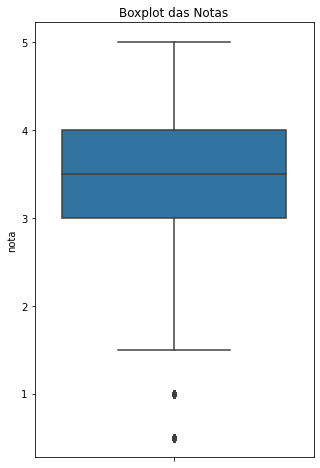

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
plt.title("Boxplot das Notas")
sns.boxplot(y=notas.nota)

# Olhando os Filmes

In [41]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas por Filme especifico

In [51]:
round(notas.query("filmeId==1").nota.mean(),2)

3.92

In [55]:
media_por_filme = notas.groupby("filmeId").nota.mean()
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

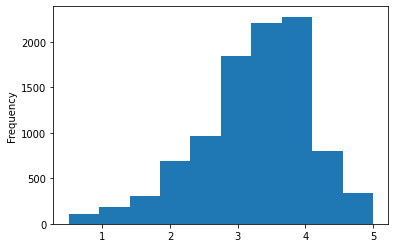

In [56]:
media_por_filme.plot(kind="hist")

Histograma feito pelo Seaborn com os Bins automaticos

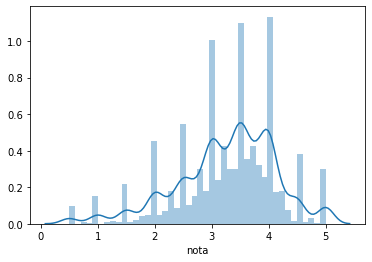

In [58]:
sns.distplot(media_por_filme)

Histograma feito pelo Seabon com a mesma quantidade de Bins que o Pandas utilizou

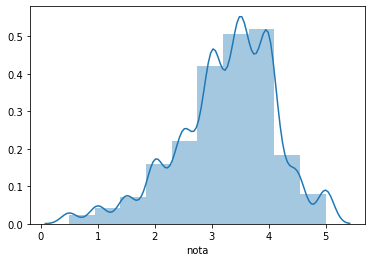

In [60]:
sns.distplot(media_por_filme, bins=10)